Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)


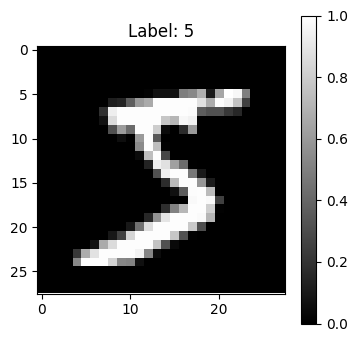

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-11-09 01:22:17.865995: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9278

2025-11-09 01:22:41.529476: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 25s 12ms/step - loss: 0.2493 - accuracy: 0.9279 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1041 - accuracy: 0.9690 - val_loss: 0.0902 - val_accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0834 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0766 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0796 - val_accuracy: 0.9763


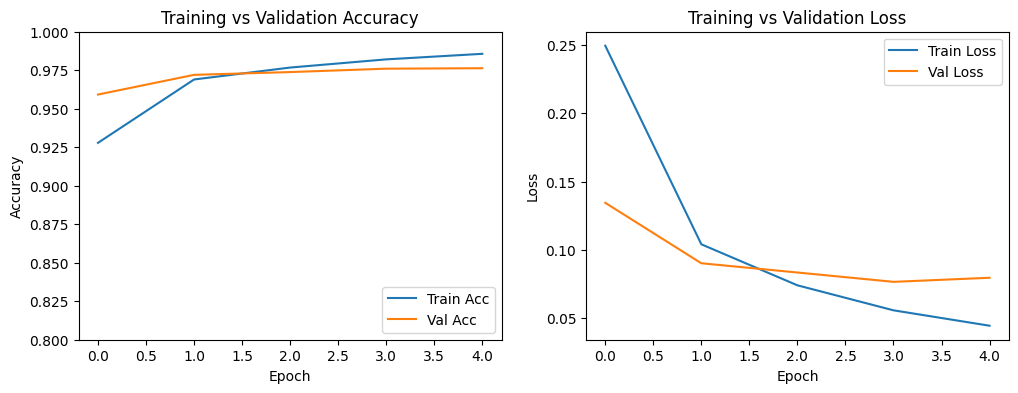

2025-11-09 01:23:59.749364: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 2s - loss: 0.0796 - accuracy: 0.9763 - 2s/epoch - 6ms/step

Final Test Accuracy: 0.9763


2025-11-09 01:24:02.767070: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 7ms/step
Predicted class: 7
True class: 7
Prediction correct: True


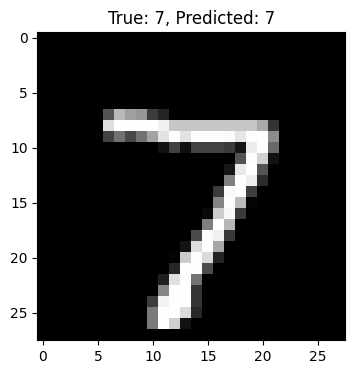

In [4]:
# === Step 1: Setup and Data Preparation ===

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize images (0–255 → 0–1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check shapes
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)

# Visualize one sample
plt.figure(figsize=(4,4))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.colorbar()
plt.show()

# === Step 2: Build Neural Network Architecture ===

model = models.Sequential()

# Input layer (flatten 28x28 image → 784 inputs)
model.add(layers.Flatten(input_shape=(28, 28)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 neurons → 10 classes)
model.add(layers.Dense(10, activation='softmax'))

# Show model summary
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train for 5 epochs (5 passes through the dataset)
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

# === Plot Accuracy and Loss Curves ===
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

# Final evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Predict probabilities for all test images
predictions = model.predict(test_images)
first_pred = predictions[0]

# Get highest probability class
predicted_class = np.argmax(first_pred)
true_class = test_labels[0]

print(f"Predicted class: {predicted_class}")
print(f"True class: {true_class}")
print(f"Prediction correct: {predicted_class == true_class}")

# Visualize prediction
plt.figure(figsize=(4,4))
plt.imshow(test_images[0], cmap='gray')
plt.title(f"True: {true_class}, Predicted: {predicted_class}")
plt.show()

